In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
baseball = pd.read_csv('baseball.csv')
baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
#Add Run Differential (RD) variable
new_col = baseball['RS'] - baseball['RA']
baseball.insert(6, 'RD', new_col)

In [4]:
#Convert 'Team' variable to numeric variable

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en = baseball.iloc[:,0].values

In [5]:
X_en =labelencoder.fit_transform(X_en)
X_en

array([ 1,  2,  3, ..., 31, 32, 37])

In [6]:
X = baseball
X['Team'] = X_en
y = baseball.iloc[:,0].values

In [7]:
full_baseball = X.copy()
full_baseball['Team'] = y
full_baseball

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,NL,2012,734,688,81,46,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,2,NL,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,AL,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,AL,2012,734,806,69,-72,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,6,NL,2012,613,759,61,-146,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,NL,1962,705,759,81,-54,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,27,NL,1962,706,626,93,80,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,31,NL,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,NL,1962,774,664,84,110,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [8]:
#Convert 'League' variable to a numeric variable

X_e = full_baseball.iloc[:,1].values

In [9]:
X_e = labelencoder.fit_transform(X_e)
X_e

array([1, 1, 0, ..., 1, 1, 0])

In [10]:
Y = full_baseball
Y['League'] = X_e

In [11]:
full_baseball2 = Y.copy()
full_baseball2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [12]:
#Replace NA's in 'RankSeason' and 'RankPlayoffs' with 0

full_baseball2[['RankSeason', 'RankPlayoffs']] = full_baseball2[['RankSeason', 'RankPlayoffs']].fillna(0)
full_baseball2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,0.0,0.0,161,NaN,NaN
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,0.0,0.0,161,NaN,NaN
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,0.0,0.0,163,NaN,NaN


In [13]:
#Predict NA's for 'OOBP'

data_without_null = full_baseball2.dropna()
data_without_null

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,41,0.356,0.434,0.271,0,0.0,0.0,162,0.345,0.423
416,32,1,1999,809,838,75,-29,0.338,0.426,0.262,0,0.0,0.0,161,0.355,0.427
417,33,0,1999,772,913,69,-141,0.343,0.411,0.274,0,0.0,0.0,162,0.371,0.448
418,35,0,1999,945,859,95,86,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459


In [14]:
train_data_x = data_without_null.iloc[:,:13]
train_data_y = data_without_null.iloc[:,13]

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data_x, train_data_y)

LinearRegression()

In [16]:
test_data = full_baseball2.iloc[:,:13]
test_data['OOBP'] = pd.DataFrame(lr.predict(test_data))
full_baseball2.OOBP.fillna(test_data.OOBP, inplace = True)
full_baseball2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317000,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306000,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315000,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331000,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335000,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,0.0,0.0,161,161.257267,NaN
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,0.0,0.0,161,161.332126,NaN
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,161.370727,NaN
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,0.0,0.0,163,161.309236,NaN


In [17]:
#Round 'OOBP' to 3 decimals

full_baseball2['OOBP'] = full_baseball2['OOBP'].round(decimals = 3)
full_baseball2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,0.0,0.0,161,161.257,NaN
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,0.0,0.0,161,161.332,NaN
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,161.371,NaN
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,0.0,0.0,163,161.309,NaN


In [18]:
#Predict NA's for 'OSLG'

data2_without_null = full_baseball2.dropna()
data2_without_null

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,41,0.356,0.434,0.271,0,0.0,0.0,162,0.345,0.423
416,32,1,1999,809,838,75,-29,0.338,0.426,0.262,0,0.0,0.0,161,0.355,0.427
417,33,0,1999,772,913,69,-141,0.343,0.411,0.274,0,0.0,0.0,162,0.371,0.448
418,35,0,1999,945,859,95,86,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459


In [19]:
train2_data_x = data2_without_null.iloc[:,:14]
train2_data_y = data2_without_null.iloc[:,14]

In [20]:
lr.fit(train2_data_x, train2_data_y)

LinearRegression()

In [21]:
test2_data = full_baseball2.iloc[:,:14]
test2_data['OSLG'] = pd.DataFrame(lr.predict(test2_data))
full_baseball2.OSLG.fillna(test2_data.OSLG, inplace = True)
full_baseball2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415000
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378000
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403000
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428000
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,0.0,0.0,161,161.257,0.340993
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,0.0,0.0,161,161.332,0.320679
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,161.371,0.324978
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,0.0,0.0,163,161.309,0.327632


In [22]:
full_baseball2['OSLG'] = full_baseball2['OSLG'].round(decimals = 3)
full_baseball2

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,46,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,-72,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,-146,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,-54,0.330,0.390,0.260,0,0.0,0.0,161,161.257,0.341
1228,27,1,1962,706,626,93,80,0.321,0.394,0.268,0,0.0,0.0,161,161.332,0.321
1229,31,1,1962,878,690,103,188,0.341,0.441,0.278,1,1.0,2.0,165,161.371,0.325
1230,32,1,1962,774,664,84,110,0.335,0.394,0.271,0,0.0,0.0,163,161.309,0.328


In [23]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [26]:
from tabulate import tabulate

In [27]:
start = time.time()

In [28]:
#Split the features and target data

X = full_baseball2.drop('Playoffs', 1)
y = full_baseball2['Playoffs']

In [29]:
#Sequential Forward Selection using Linear Regression


sfs = sfs(LinearRegression(), k_features = 8, forward = True, floating = False, scoring = 'r2', cv = 0)

In [30]:
#Select the top 8 features

sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(8, 8),
                          scoring='r2')

In [31]:
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(11,)",[0.83211235285391],0.832112,"(RankPlayoffs,)"
2,"(10, 11)",[0.858596148257184],0.858596,"(RankSeason, RankPlayoffs)"
3,"(5, 10, 11)",[0.8801426257932932],0.880143,"(W, RankSeason, RankPlayoffs)"
4,"(2, 5, 10, 11)",[0.8816191472693344],0.881619,"(Year, W, RankSeason, RankPlayoffs)"
5,"(2, 5, 10, 11, 12)",[0.881966454598214],0.881966,"(Year, W, RankSeason, RankPlayoffs, G)"
6,"(0, 2, 5, 10, 11, 12)",[0.8821834178398497],0.882183,"(Team, Year, W, RankSeason, RankPlayoffs, G)"
7,"(0, 2, 5, 8, 10, 11, 12)",[0.8822968117608856],0.882297,"(Team, Year, W, SLG, RankSeason, RankPlayoffs, G)"
8,"(0, 2, 4, 5, 8, 10, 11, 12)",[0.8824894641360267],0.882489,"(Team, Year, RA, W, SLG, RankSeason, RankPlayo..."


In [32]:
end = time.time()
elapsed_time = end - start
print('Execution time:', elapsed_time, 'seconds')

Execution time: 0.3061788082122803 seconds


In [33]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


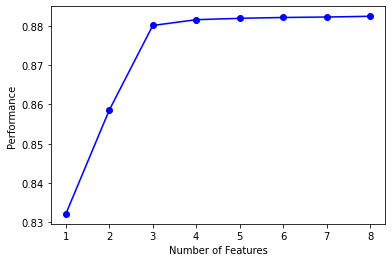

In [34]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

In [35]:
#Remove unneccessary variables for comparison (Year, Team, league, RankSeason, RankPlayoffs, G)
start1 = time.time()

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

baseball_3 = full_baseball2.drop(['Year', 'Team', 'League', 'RankSeason', 'RankPlayoffs', 'G'], axis = 1)
baseball_3

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,161.257,0.341
1228,706,626,93,80,0.321,0.394,0.268,0,161.332,0.321
1229,878,690,103,188,0.341,0.441,0.278,1,161.371,0.325
1230,774,664,84,110,0.335,0.394,0.271,0,161.309,0.328


In [36]:
sfs1 = sfs(LinearRegression(), k_features = 8, forward = True, floating = False, scoring = 'r2', cv = 0)

In [37]:
X1 = baseball_3.drop('Playoffs', 1)
y1 = baseball_3['Playoffs']

In [38]:
sfs1.fit(X1, y1)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(8, 8),
                          scoring='r2')

In [39]:
df_SFS1_results = pd.DataFrame(sfs1.subsets_).transpose()
df_SFS1_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)",[0.3803895539332304],0.38039,"(W,)"
2,"(2, 7)",[0.39741325133666705],0.397413,"(W, OOBP)"
3,"(2, 4, 7)",[0.3986969518744713],0.398697,"(W, OBP, OOBP)"
4,"(2, 4, 6, 7)",[0.39996870227155024],0.399969,"(W, OBP, BA, OOBP)"
5,"(0, 2, 4, 6, 7)",[0.4001877576289292],0.400188,"(RS, W, OBP, BA, OOBP)"
6,"(0, 2, 4, 5, 6, 7)",[0.40028997108719555],0.40029,"(RS, W, OBP, SLG, BA, OOBP)"
7,"(0, 2, 4, 5, 6, 7, 8)",[0.4003357222184193],0.400336,"(RS, W, OBP, SLG, BA, OOBP, OSLG)"
8,"(0, 2, 3, 4, 5, 6, 7, 8)",[0.4003600611917931],0.40036,"(RS, W, RD, OBP, SLG, BA, OOBP, OSLG)"


In [40]:
end1 = time.time()
time_elapsed1 = end1 - start1
print('Execution time:', time_elapsed1, 'seconds')

Execution time: 0.3281233310699463 seconds


C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


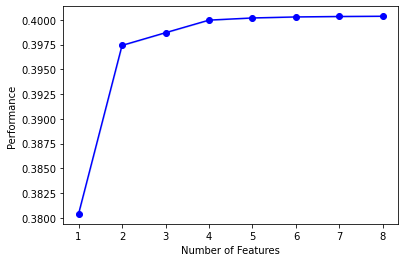

In [41]:
fig2 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

In [42]:
#Sequential Backward Selection using Linear Regression
start2 = time.time()

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
sbs = sfs(LinearRegression(), k_features = 8, forward = False, floating = False, scoring = 'r2', cv = 0)

In [43]:
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(8, 8), scoring='r2')

In [44]:
df_SBS_results = pd.DataFrame(sbs.subsets_).transpose()
df_SBS_results

,feature_idx,cv_scores,avg_score,feature_names
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[0.8829902516051192],0.88299,"(Team, League, Year, RS, RA, W, RD, OBP, SLG, ..."
14,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)",[0.8829902516051192],0.88299,"(Team, League, Year, RS, W, RD, OBP, SLG, BA, ..."
13,"(0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14)",[0.8829713022248507],0.882971,"(Team, League, Year, RS, W, OBP, SLG, BA, Rank..."
12,"(0, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14)",[0.8829441415015215],0.882944,"(Team, Year, RS, W, OBP, SLG, BA, RankSeason, ..."
11,"(0, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14)",[0.8829149449893241],0.882915,"(Team, Year, RS, W, OBP, SLG, RankSeason, Rank..."
10,"(0, 2, 5, 7, 8, 10, 11, 12, 13, 14)",[0.8828220797382021],0.882822,"(Team, Year, W, OBP, SLG, RankSeason, RankPlay..."
9,"(0, 2, 5, 8, 10, 11, 12, 13, 14)",[0.8827803612736569],0.88278,"(Team, Year, W, SLG, RankSeason, RankPlayoffs,..."
8,"(2, 5, 8, 10, 11, 12, 13, 14)",[0.8826233268927756],0.882623,"(Year, W, SLG, RankSeason, RankPlayoffs, G, OO..."


In [45]:
end2 = time.time()
time_elapsed2 = end2 - start2
print('Execution time:', time_elapsed2, 'seconds')

Execution time: 0.35804224014282227 seconds


C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


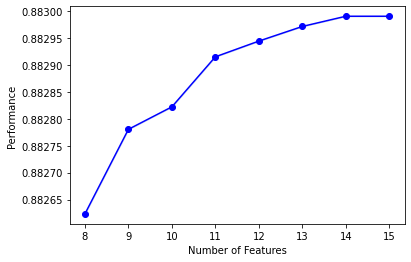

In [46]:
fig2 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

In [47]:
#Remove unneccessary variables for comparison (Year, Team, league, RankSeason, RankPlayoffs, G)

baseball_3

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,161.257,0.341
1228,706,626,93,80,0.321,0.394,0.268,0,161.332,0.321
1229,878,690,103,188,0.341,0.441,0.278,1,161.371,0.325
1230,774,664,84,110,0.335,0.394,0.271,0,161.309,0.328


In [48]:
start3 = time.time()

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

sbs1 = sfs(LinearRegression(), k_features = 1, forward = False, floating = False, scoring = 'r2', cv = 0)

In [49]:
sbs1.fit(X1, y1)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(1, 1), scoring='r2')

In [50]:
df_SBS1_results = pd.DataFrame(sbs1.subsets_).transpose()
df_SBS1_results

,feature_idx,cv_scores,avg_score,feature_names
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",[0.4003600611917931],0.40036,"(RS, RA, W, RD, OBP, SLG, BA, OOBP, OSLG)"
8,"(0, 2, 3, 4, 5, 6, 7, 8)",[0.4003600611917931],0.40036,"(RS, W, RD, OBP, SLG, BA, OOBP, OSLG)"
7,"(0, 2, 4, 5, 6, 7, 8)",[0.4003357222184193],0.400336,"(RS, W, OBP, SLG, BA, OOBP, OSLG)"
6,"(0, 2, 4, 5, 6, 7)",[0.40028997108719555],0.40029,"(RS, W, OBP, SLG, BA, OOBP)"
5,"(0, 2, 4, 6, 7)",[0.4001877576289292],0.400188,"(RS, W, OBP, BA, OOBP)"
4,"(2, 4, 6, 7)",[0.39996870227155024],0.399969,"(W, OBP, BA, OOBP)"
3,"(2, 4, 7)",[0.3986969518744713],0.398697,"(W, OBP, OOBP)"
2,"(2, 7)",[0.39741325133666705],0.397413,"(W, OOBP)"
1,"(2,)",[0.3803895539332304],0.38039,"(W,)"


In [51]:
end3 = time.time()
time_elapsed3 = end3 - start3
print('Execution time:', time_elapsed3, 'seconds')

Execution time: 0.2622959613800049 seconds


C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


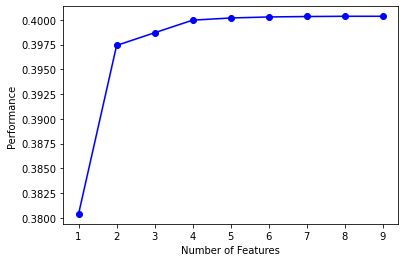

In [52]:
fig3 = plot_sfs(sbs1.get_metric_dict(), kind='std_dev')

In [53]:
#Sequential Forward Selection using KNN
start4 = time.time()

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier

sfs2 = sfs(KNeighborsClassifier(), k_features = 8, forward = True, floating = False, scoring = 'accuracy', cv = 4)

In [54]:
sfs2.fit(X, y)

SequentialFeatureSelector(cv=4, estimator=KNeighborsClassifier(),
                          k_features=(8, 8), scoring='accuracy')

In [55]:
df_SFS2_results = pd.DataFrame(sfs2.subsets_).transpose()
df_SFS2_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(10,)","[1.0, 1.0, 1.0, 1.0]",1,"(RankSeason,)"
2,"(1, 10)","[1.0, 1.0, 1.0, 1.0]",1,"(League, RankSeason)"
3,"(1, 7, 10)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, RankSeason)"
4,"(1, 7, 8, 10)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, RankSeason)"
5,"(1, 7, 8, 9, 10)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason)"
6,"(1, 7, 8, 9, 10, 11)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason, RankPlayoffs)"
7,"(1, 7, 8, 9, 10, 11, 14)","[1.0, 1.0, 1.0, 1.0]",1,"(League, OBP, SLG, BA, RankSeason, RankPlayoff..."
8,"(1, 7, 8, 9, 10, 11, 13, 14)","[0.9967532467532467, 1.0, 1.0, 1.0]",0.999188,"(League, OBP, SLG, BA, RankSeason, RankPlayoff..."


In [56]:
end4 = time.time()
time_elapsed4 = end4 - start4
print('Execution time:', time_elapsed4, 'seconds')

Execution time: 5.0152366161346436 seconds


In [57]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

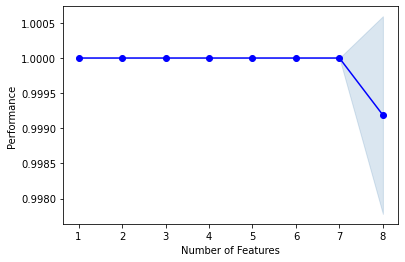

In [58]:
fig4 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')

In [59]:
#Remove unneccessary variables for comparison (Year, Team, league, RankSeason, RankPlayoffs, G)
baseball_3

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,161.257,0.341
1228,706,626,93,80,0.321,0.394,0.268,0,161.332,0.321
1229,878,690,103,188,0.341,0.441,0.278,1,161.371,0.325
1230,774,664,84,110,0.335,0.394,0.271,0,161.309,0.328


In [60]:
sfs3 = sfs(KNeighborsClassifier(), k_features = 8, forward = True, floating = False, scoring = 'accuracy', cv = 4)

In [78]:
start5 = time.time()
sfs3.fit(X1, y1)

SequentialFeatureSelector(cv=4, estimator=KNeighborsClassifier(),
                          k_features=(8, 8), scoring='accuracy')

In [79]:
df_SFS3_results = pd.DataFrame(sfs3.subsets_).transpose()
df_SFS3_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)","[0.9155844155844156, 0.922077922077922, 0.8766...",0.900162,"(W,)"
2,"(2, 5)","[0.9318181818181818, 0.935064935064935, 0.8668...",0.905844,"(W, SLG)"
3,"(2, 5, 8)","[0.9123376623376623, 0.9512987012987013, 0.870...",0.905032,"(W, SLG, OSLG)"
4,"(2, 5, 6, 8)","[0.9123376623376623, 0.9512987012987013, 0.863...",0.902597,"(W, SLG, BA, OSLG)"
5,"(2, 4, 5, 6, 8)","[0.9155844155844156, 0.9448051948051948, 0.850...",0.896916,"(W, OBP, SLG, BA, OSLG)"
6,"(1, 2, 4, 5, 6, 8)","[0.8928571428571429, 0.9058441558441559, 0.860...",0.890422,"(RA, W, OBP, SLG, BA, OSLG)"
7,"(1, 2, 3, 4, 5, 6, 8)","[0.8636363636363636, 0.9090909090909091, 0.853...",0.874188,"(RA, W, RD, OBP, SLG, BA, OSLG)"
8,"(0, 1, 2, 3, 4, 5, 6, 8)","[0.8538961038961039, 0.8863636363636364, 0.844...",0.862825,"(RS, RA, W, RD, OBP, SLG, BA, OSLG)"


In [80]:
end5 = time.time()
time_elapsed5 = end5 - start5
print('Execution time:', time_elapsed5, 'seconds')

Execution time: 2.8663392066955566 seconds


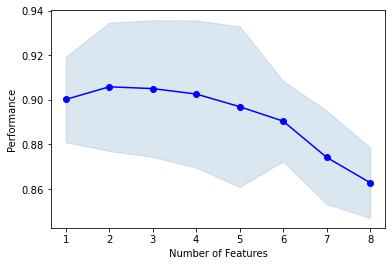

In [81]:
fig5 = plot_sfs(sfs3.get_metric_dict(), kind='std_dev')

In [65]:
#Backward Elimination using KNN

start6 = time.time()

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier

sfs4 = sfs(KNeighborsClassifier(), k_features = 8, forward = False, floating = False, scoring = 'accuracy', cv = 0)

In [66]:
sfs4.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=KNeighborsClassifier(), forward=False,
                          k_features=(8, 8), scoring='accuracy')

In [67]:
df_SFS4_results = pd.DataFrame(sfs4.subsets_).transpose()
df_SFS4_results

,feature_idx,cv_scores,avg_score,feature_names
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[0.9188311688311688],0.918831,"(Team, League, Year, RS, RA, W, RD, OBP, SLG, ..."
14,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)",[0.924512987012987],0.924513,"(Team, League, Year, RS, W, RD, OBP, SLG, BA, ..."
13,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)",[0.9439935064935064],0.943994,"(Team, League, Year, W, RD, OBP, SLG, BA, Rank..."
12,"(0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 13, 14)",[0.9853896103896104],0.98539,"(Team, League, Year, W, OBP, SLG, BA, RankSeas..."
11,"(0, 1, 5, 7, 8, 9, 10, 11, 12, 13, 14)",[0.9918831168831169],0.991883,"(Team, League, W, OBP, SLG, BA, RankSeason, Ra..."
10,"(1, 5, 7, 8, 9, 10, 11, 12, 13, 14)",[0.997564935064935],0.997565,"(League, W, OBP, SLG, BA, RankSeason, RankPlay..."
9,"(1, 7, 8, 9, 10, 11, 12, 13, 14)",[0.9991883116883117],0.999188,"(League, OBP, SLG, BA, RankSeason, RankPlayoff..."
8,"(1, 7, 8, 9, 10, 11, 12, 14)",[1.0],1,"(League, OBP, SLG, BA, RankSeason, RankPlayoff..."


In [68]:
end6 = time.time()
time_elapsed6 = end6 - start6
print('Execution time:', time_elapsed6, 'seconds')

Execution time: 8.60699200630188 seconds


C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


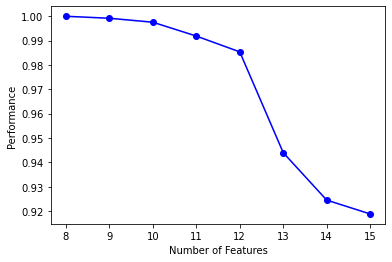

In [69]:
fig6 = plot_sfs(sfs4.get_metric_dict(), kind='std_dev')

In [82]:
#Remove unneccessary variables for comparison (Year, Team, league, RankSeason, RankPlayoffs, G)
start7 = time.time()
baseball_3

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,161.257,0.341
1228,706,626,93,80,0.321,0.394,0.268,0,161.332,0.321
1229,878,690,103,188,0.341,0.441,0.278,1,161.371,0.325
1230,774,664,84,110,0.335,0.394,0.271,0,161.309,0.328


In [83]:
sfs5 = sfs(KNeighborsClassifier(), k_features = 1, forward = False, floating = False, scoring = 'accuracy', cv = 0)

In [84]:
sfs5.fit(X1, y1)

SequentialFeatureSelector(cv=0, estimator=KNeighborsClassifier(), forward=False,
                          k_features=(1, 1), scoring='accuracy')

In [85]:
df_SFS5_results = pd.DataFrame(sfs5.subsets_).transpose()
df_SFS5_results

,feature_idx,cv_scores,avg_score,feature_names
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",[0.9147727272727273],0.914773,"(RS, RA, W, RD, OBP, SLG, BA, OOBP, OSLG)"
8,"(0, 1, 2, 3, 4, 5, 6, 8)",[0.9155844155844156],0.915584,"(RS, RA, W, RD, OBP, SLG, BA, OSLG)"
7,"(1, 2, 3, 4, 5, 6, 8)",[0.922077922077922],0.922078,"(RA, W, RD, OBP, SLG, BA, OSLG)"
6,"(1, 2, 3, 4, 5, 6)",[0.9228896103896104],0.92289,"(RA, W, RD, OBP, SLG, BA)"
5,"(1, 2, 3, 4, 5)",[0.9228896103896104],0.92289,"(RA, W, RD, OBP, SLG)"
4,"(1, 2, 3, 5)",[0.9228896103896104],0.92289,"(RA, W, RD, SLG)"
3,"(1, 2, 3)",[0.9237012987012987],0.923701,"(RA, W, RD)"
2,"(2, 3)",[0.9237012987012987],0.923701,"(W, RD)"
1,"(2,)",[0.9058441558441559],0.905844,"(W,)"


In [86]:
end7 = time.time()
time_elapsed7 = end7 - start7
print('Execution time:', time_elapsed7, 'seconds')

Execution time: 3.541532278060913 seconds


C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\abern\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


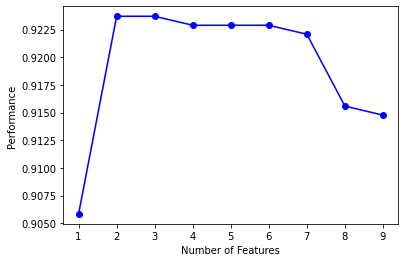

In [75]:
fig7 = plot_sfs(sfs5.get_metric_dict(), kind='std_dev')